In [109]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

In [110]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))   
    return g

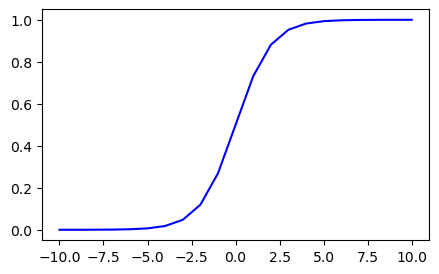

In [111]:
z_tmp = np.arange(-10,11)

y = sigmoid(z_tmp)

_, ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

In [112]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y = np.array([0, 0, 0, 1, 1, 1])
pos = y == 1
neg = y == 0
print(f'Positive y labels: {pos}')
print(f'Negative y labels: {neg}')
print(f'X values of positive y label: \n{X[pos]}')
print(f'X values of positive y label: \n{X[neg]}')

Positive y labels: [False False False  True  True  True]
Negative y labels: [ True  True  True False False False]
X values of positive y label: 
[[3.  0.5]
 [2.  2. ]
 [1.  2.5]]
X values of positive y label: 
[[0.5 1.5]
 [1.  1. ]
 [1.5 0.5]]


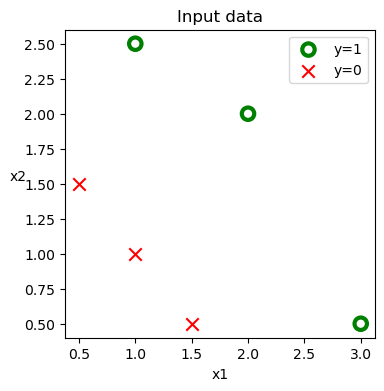

In [113]:
_, ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(X[pos, 0], X[pos, 1], marker='o', s=80, color='g', label='y=1', lw=3, facecolors='none')
ax.scatter(X[neg, 0], X[neg, 1], marker='x', s=80, color='r', label='y=0')
plt.title('Input data')
plt.xlabel('x1')
plt.ylabel('x2', rotation=0)
ax.legend(loc='best')

# Cost function:

In [114]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    
    for i in range(m):
        z = np.dot(X[i], w) + b
        f_x_i = sigmoid(z)
        cost += y[i] * np.log(f_x_i) + (1 - y[i]) * np.log(1 - f_x_i)
    cost = cost / (-1*m)
    return cost
        

In [118]:
w = np.array([1,1])
b = -3
print(f'Computed cost = {compute_cost(X, y, w, b):.4f}')

Computed cost = 0.3669


In [120]:
def get_line_function(x, w, b):
    line = np.dot(x, w) + b 
    return line

Cost for b = -3 :  1.37733235617021
Cost for b = -4 :  1.5149783425270023


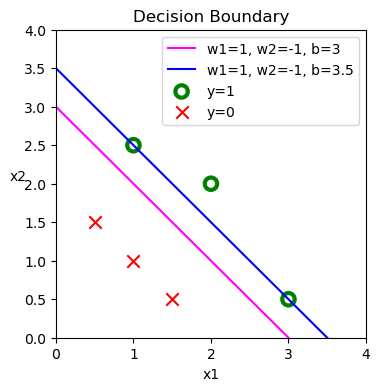

In [122]:
# Model parameters
w = np.array([1, -2])
b_1 = 3
b_2 = 3.5

print("Cost for b = -3 : ", compute_cost(X, y, w, b_1))
print("Cost for b = -4 : ", compute_cost(X, y, w, b_2))

x0 = np.arange(0,6)
x1 = np.arange(0,6)
x = np.c_[x0, x1]

line_1 = get_line_function(x, w, b_1)
line_2 = get_line_function(x, w, b_2)

_, ax = plt.subplots(1,1,figsize=(4,4))
# Plot the decision boundary
# ax.plot(x0, line_1, c='magenta', label="$b$=3")
ax.plot(x0, line_1, c='magenta', label="w1=1, w2=-1, b=3")
ax.plot(x0, line_2, c='b', label="w1=1, w2=-1, b=3.5")
ax.axis([0, 4, 0, 4])

# Plot the input data
ax.scatter(X[pos, 0], X[pos, 1], marker='o', s=80, color='g', label='y=1', lw=3, facecolors='none')
ax.scatter(X[neg, 0], X[neg, 1], marker='x', s=80, color='r', label='y=0')
plt.title('Input data')
plt.xlabel('x1')
plt.ylabel('x2', rotation=0)
ax.legend(loc='best')

plt.title("Decision Boundary")
plt.show()